In [1]:
!python --version

Python 3.8.13


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
datasets = ['LCL', 'BOREALIS', 'SCEAUX', 'SMART', 'IDEAL']

In [5]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/{result_type}*.csv')
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            #df = df[df.NRMSE <= 1]
            print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [6]:
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

LCL
results/LCL\agg_metrics_LCL-2012.csv (703, 9)
results/LCL\agg_metrics_LCL-2012.csv (703, 9)  After filtering
results/LCL\agg_metrics_LCL-2013.csv (702, 9)
results/LCL\agg_metrics_LCL-2013.csv (702, 9)  After filtering
LCL 1405 

BOREALIS
results/BOREALIS\agg_metrics_Borealis.csv (15, 9)
results/BOREALIS\agg_metrics_Borealis.csv (15, 9)  After filtering
BOREALIS 15 

SCEAUX
results/SCEAUX\agg_metrics_Sceaux.csv (4, 9)
results/SCEAUX\agg_metrics_Sceaux.csv (4, 9)  After filtering
SCEAUX 4 

SMART
results/SMART\agg_metrics_SMART.csv (11, 9)
results/SMART\agg_metrics_SMART.csv (11, 9)  After filtering
SMART 11 

IDEAL
results/IDEAL\agg_metrics_IDEAL.csv (350, 9)
results/IDEAL\agg_metrics_IDEAL.csv (350, 9)  After filtering
IDEAL 350 

(1785, 11)


In [7]:
# test_agg.columns
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,1785.000000,1785.000000
mean,0.426886,inf
std,0.163520,NaN
min,0.075173,0.178093
25%,0.325146,0.675563
50%,0.409767,0.878520
75%,0.495449,1.103107
max,2.000000,inf


In [8]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,1785.000000,1785.000000
mean,0.426886,inf
std,0.163520,NaN
min,0.075173,0.178093
25%,0.325146,0.675563
50%,0.409767,0.878520
75%,0.495449,1.103107
max,2.000000,inf


## agg - Test ALL

In [9]:
combined = test_agg

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

res_agg1.mul(100).round(2)

SMAPE               NRMSE           
              mean    std median  mean std median
result_type                                      
agg_metrics  42.69  16.35  40.98   NaN NaN  87.85

In [10]:
combined.head()

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,LCL,LCL-2012.csv,MAC004982_2012,0.106976,0.011444,0.047160,0.965758,0.715853,1.398784,0.734122
1,agg_metrics,LCL,LCL-2012.csv,MAC002854_2012,0.268765,0.072234,0.096908,0.669341,0.539362,2.096638,0.657473
2,agg_metrics,LCL,LCL-2012.csv,MAC004653_2012,0.163317,0.026672,0.104066,0.571238,0.622539,0.917824,0.877969
3,agg_metrics,LCL,LCL-2012.csv,MAC002871_2012,0.135776,0.018435,0.062595,0.354153,0.358126,0.818116,0.721708
4,agg_metrics,LCL,LCL-2012.csv,MAC005430_2012,0.147613,0.021790,0.076777,0.297825,0.339007,0.764779,1.117145


In [11]:
combined.filename.value_counts()/2

LCL-2012.csv    351.5
LCL-2013.csv    351.0
Borealis.csv      7.5
SMART.csv         5.5
Sceaux.csv        2.0
Name: filename, dtype: float64

## add - Test  by dataset

In [12]:
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

res_agg2.mul(100).round(2)

NRMSE
                     median
result_type dataset        
agg_metrics BOREALIS  74.10
            LCL       84.01
            SCEAUX    75.76
            SMART     88.62

In [13]:
cols = ['result_type', 'dataset', 'NRMSE', 'SMAPE', 'MAE', 'MSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {'SMAPE': ['median'],
                                                                    'NRMSE': ['median'],
                                                                    'MAE': ['median']})
                                                                    
res_agg2.mul(100).round(2)

SMAPE  NRMSE    MAE
                     median median median
result_type dataset                      
agg_metrics BOREALIS  33.63  74.10  24.02
            LCL       41.04  84.01   7.37
            SCEAUX    48.87  75.76  53.13
            SMART     42.44  88.62  35.84

In [15]:
combined['NRMSE'].describe()

count    1785.000000
mean             inf
std              NaN
min         0.178093
25%         0.675563
50%         0.878520
75%         1.103107
max              inf
Name: NRMSE, dtype: float64

Index(['BOREALIS', 'SCEAUX', 'LCL', 'SMART'], dtype='object', name='dataset')


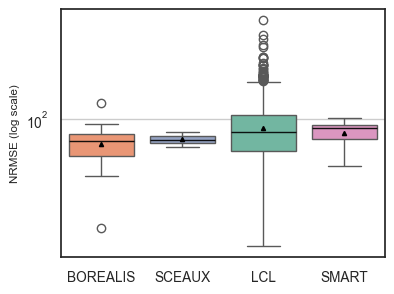

In [14]:
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'serif',
      'font.size' : 14}
plt.rcParams.update(rc)

#seaborn.set(style='whitegrid')
seaborn.set(style='white', font_scale=0.7)


plt.figure(figsize=(4, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = combined.reset_index().copy()
#map_names = {'BDG-2-50epoch': 'BDG-2', 'Electricity-50epoch': 'Electricity', 'Buildings-900K-test-50epoch': 'Buildings-900K-test'}
#test_agg1['dataset'] = test_agg1['dataset'].map(map_names)

test_agg1.NRMSE = test_agg1.NRMSE * 100
#test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
#test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
#test_agg1.building_type = test_agg1.building_type.str.capitalize()

# Find the order
my_order = test_agg1.groupby(by=["dataset"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='dataset', y='NRMSE', fill=True, hue='dataset',
                      order=my_order,                       
                medianprops=dict(color="black", alpha=0.9),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1,
                     legend=False)
res.tick_params(labelsize=9.8)
res.set_yscale('log')

plt.title(label='')

plt.ylabel("NRMSE (log scale)")
# plt.ylim(0,400)
plt.xlabel("")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
# plt.savefig("chronos-nrmse-error-residential-dataset-boxplot.pdf", bbox_inches='tight')
plt.show()

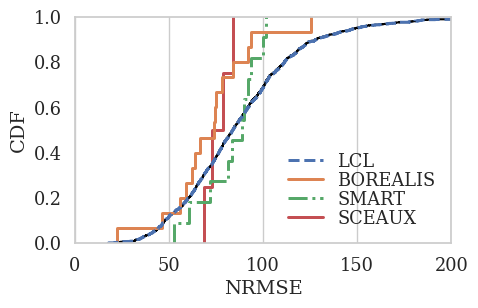

In [15]:
sns.set_theme(style="whitegrid", font_scale=1.16)


date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()

copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
copy_df = copy_df.sort_values('NRMSE')
# name = ['Mean', 'LCL', 'BOREALIS', 'IDEAL', 'SMART', 'SCEAUX']
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset', ax=ax, lw=2.15)


for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['--', '-', 'dashdot'], ax.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

#plt.xlim(0,80)
# ax_s.set_xscale('log')
ax_s.set_xlim(0, 200)
# ax.set_aspect('equal', adjustable='box')
# ax.legend(labels=name)
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)

plt.title(label='')
# plt.legend()
plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-residential-error-cdfplot.pdf", bbox_inches='tight')
plt.show()

In [20]:
test_agg[test_agg['NRMSE'] > 0.9].sort_values('NRMSE', ascending=False)

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
59,agg_metrics,LCL,LCL-2012.csv,MAC004672_2012,0.229894,0.052851,0.093945,NaN,2.000000,inf,0.056907
111,agg_metrics,LCL,LCL-2013.csv,MAC004672_2013,0.208858,0.043622,0.085494,NaN,2.000000,inf,NaN
377,agg_metrics,LCL,LCL-2013.csv,MAC002136_2013,0.208858,0.043622,0.085494,NaN,2.000000,inf,NaN
205,agg_metrics,LCL,LCL-2013.csv,MAC002873_2013,0.062711,0.003933,0.014366,0.802359,1.670655,3.859383,3.286445
650,agg_metrics,LCL,LCL-2013.csv,MAC002863_2013,0.125563,0.015766,0.045875,0.359766,1.008992,3.170947,0.769217
...,...,...,...,...,...,...,...,...,...,...,...
327,agg_metrics,IDEAL,IDEAL.csv,home268_2018,0.151893,0.023072,0.067394,0.301446,0.306194,0.902344,1.006062
552,agg_metrics,LCL,LCL-2013.csv,MAC003333_2013,0.166220,0.027629,0.082741,0.353818,0.341984,0.901903,0.962489
280,agg_metrics,LCL,LCL-2013.csv,MAC003202_2013,0.143100,0.020478,0.075057,0.706256,0.460631,0.901508,0.718185
9,agg_metrics,SMART,SMART.csv,HomeC_2016,0.763418,0.582807,0.368784,0.489164,0.424381,0.901120,0.832458


In [39]:
test_agg[test_agg['dataset'] == 'SMART'].building.apply(lambda x: x.split('_')[0]).unique().shape

(5,)

In [40]:
test_agg[test_agg['dataset'] == 'SCEAUX'].building.unique()

array(['Sceaux_2008', 'Sceaux_2010', 'Sceaux_2009', 'Sceaux_2007'],
      dtype=object)

In [19]:
grouped = test_agg.sort_values('NRMSE', ascending=False).groupby('dataset')

In [20]:
for dataset in test_agg.dataset.unique():
    print(dataset, grouped.get_group(dataset).building.unique().shape)

LCL (1405,)
BOREALIS (15,)
SCEAUX (4,)
SMART (11,)
IDEAL (350,)


In [14]:
grouped = test_agg[test_agg['NRMSE'] > 0.5].sort_values('NRMSE', ascending=False).groupby('dataset')

In [15]:
for dataset in test_agg.dataset.unique():
    print(dataset, grouped.get_group(dataset).shape)

LCL (1241, 11)
BOREALIS (13, 11)
SCEAUX (4, 11)
SMART (11, 11)
IDEAL (343, 11)
